In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
pr=pd.read_excel(r'C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\capstone project\Student Applications & Performance.xlsx')
pr.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [3]:
pr.shape

(3400, 56)

In [4]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [5]:
pr.isna().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [6]:
pr['RETURNED_2ND_YR'].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [7]:
### Creating target feature
# RETURNED_2ND_YR

#Create a new feature called attrition from the RETURNED_2ND_YR
pr['Attrition']=pr['RETURNED_2ND_YR']

#dropping RETURNED_2ND_YR
pr.drop('RETURNED_2ND_YR',axis=1,inplace=True)

In [8]:
#swapping 1&0 in Attrition, so 1 represents students who discontinued
pr['Attrition']=pr['Attrition'].apply(lambda x: 0 if x == 1 else 1)

In [9]:
pr['Attrition'].value_counts()

0    2677
1     723
Name: Attrition, dtype: int64

# EDA

## Target - Attrition

In [10]:
#target is imbalance, we treat it in further process
pr['Attrition'].value_counts(normalize=True)

0    0.787353
1    0.212647
Name: Attrition, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


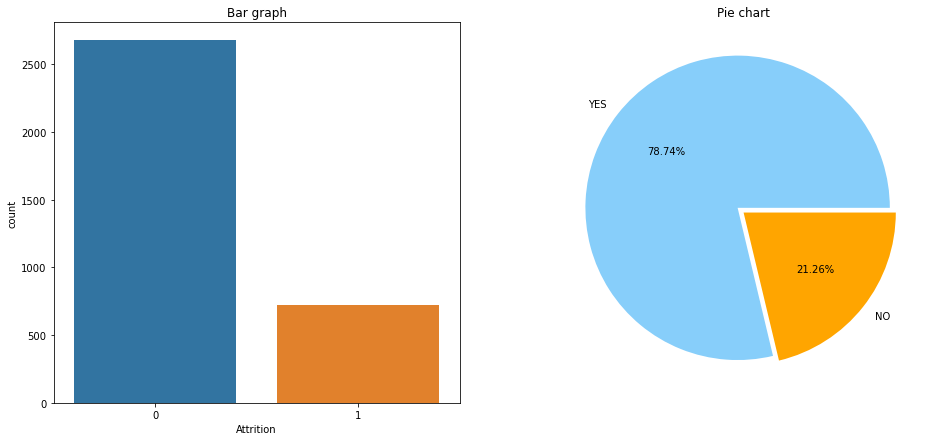

In [11]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.countplot(pr['Attrition'])
plt.title('Bar graph')

plt.subplot(1,2,2)
plt.pie(pr['Attrition'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.show()

# STUDENT IDENTIFIER

In [12]:
pr['STUDENT IDENTIFIER'].nunique()

#There 3400 unique id's, unique id for each record.
#Insignificant variable, we can remove this feature

3400

# STDNT_AGE

In [13]:
pr['STDNT_AGE'].describe()
#IQR method will be not possible because Q1, Q3, Q2 are same

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STDNT_AGE', ylabel='Density'>

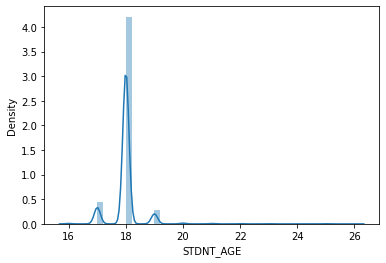

In [14]:
#distribution

sns.distplot(pr['STDNT_AGE'])

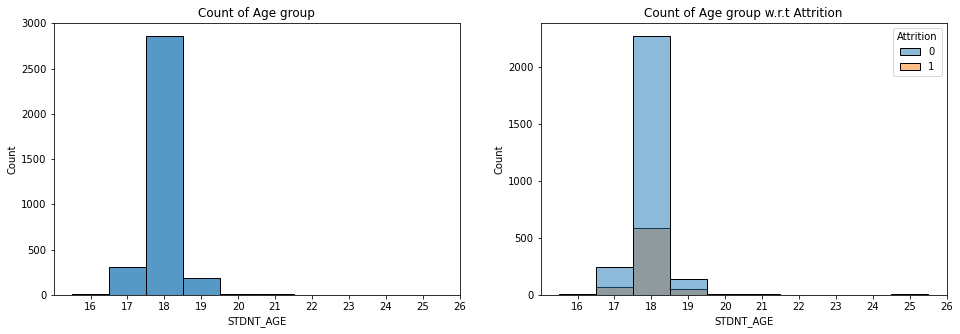

In [15]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(pr['STDNT_AGE'], binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1) , labels=np.arange(16,27))
plt.title('Count of Age group')

plt.subplot(1,2,2)
sns.histplot(data=pr, x='STDNT_AGE', hue='Attrition', binwidth=1,color=[ 'lightskyblue', 'orange'])
plt.xticks(ticks=np.arange(16.5,27.5,1) , labels=np.arange(16,27))
plt.title('Count of Age group w.r.t Attrition')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_AGE'>

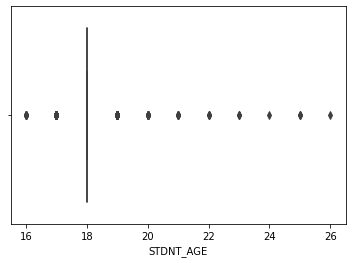

In [16]:
#outliers in AGE group

sns.boxplot(pr['STDNT_AGE'])

In [17]:
pr['STDNT_AGE'].value_counts()

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
23       3
25       3
26       1
24       1
Name: STDNT_AGE, dtype: int64

# STDNT_GENDER

In [18]:
pr['STDNT_GENDER'].value_counts()

#Female students are more

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [19]:
pr['STDNT_GENDER'].value_counts(normalize=True)*100

F    62.941176
M    37.058824
Name: STDNT_GENDER, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


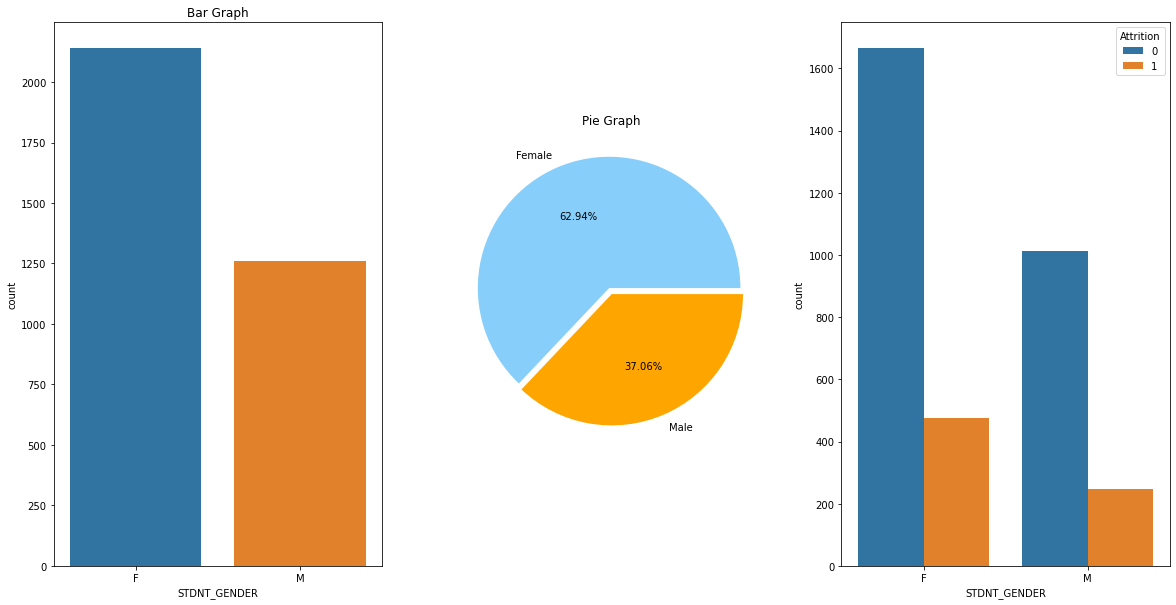

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(pr['STDNT_GENDER'])
plt.title('Bar Graph')

plt.subplot(1,3,2)
plt.pie(pr['STDNT_GENDER'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['Female', 'Male'], autopct='%.2f%%')
plt.title('Pie Graph')

plt.subplot(1,3,3)
sns.countplot(pr['STDNT_GENDER'],hue=pr['Attrition'])
plt.show()

# STDNT_BACKGROUND

In [21]:
pr['STDNT_BACKGROUND'].value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


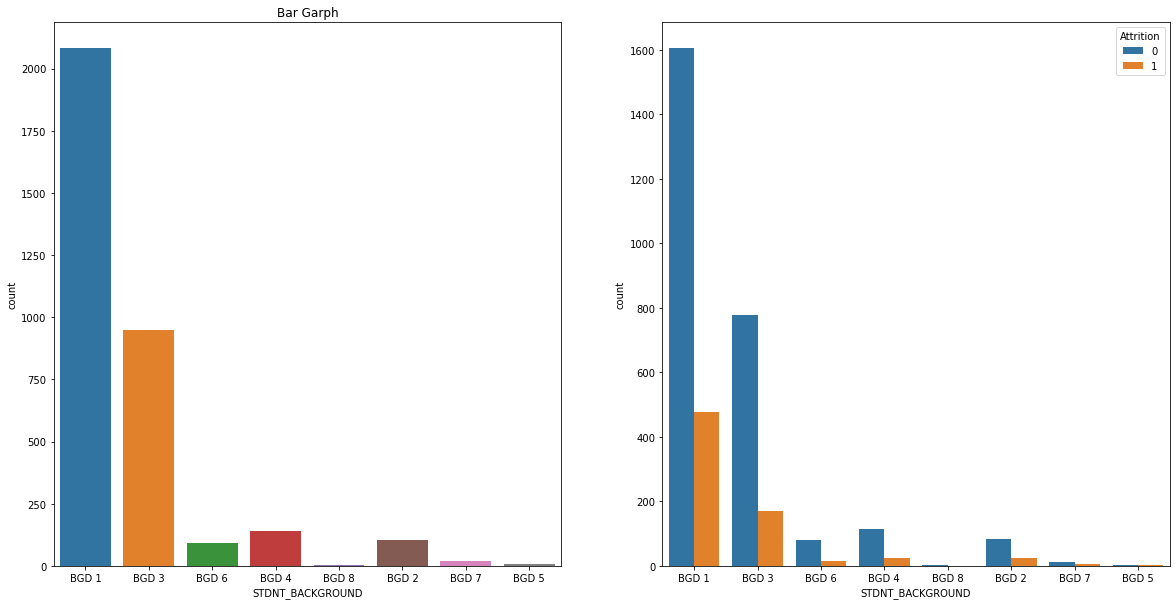

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(pr['STDNT_BACKGROUND'])
plt.title('Bar Garph')

plt.subplot(1,2,2)
sns.countplot(pr['STDNT_BACKGROUND'],hue=pr['Attrition'])
plt.show()

In [23]:
pd.crosstab(index=pr['STDNT_BACKGROUND'], columns=pr['Attrition'])

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,1605,477
BGD 2,82,24
BGD 3,777,170
BGD 4,113,26
BGD 5,4,4
BGD 6,80,14
BGD 7,12,7
BGD 8,4,1


In [24]:
pd.crosstab(index=pr['STDNT_BACKGROUND'], columns=pr['Attrition'],normalize='index')

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,0.770893,0.229107
BGD 2,0.773585,0.226415
BGD 3,0.820486,0.179514
BGD 4,0.812950,0.187050
BGD 5,0.500000,0.500000
BGD 6,0.851064,0.148936
BGD 7,0.631579,0.368421
BGD 8,0.800000,0.200000


In [25]:
pr_yes = pr[pr['Attrition'] == 1]
pr_no = pr[pr['Attrition'] == 0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


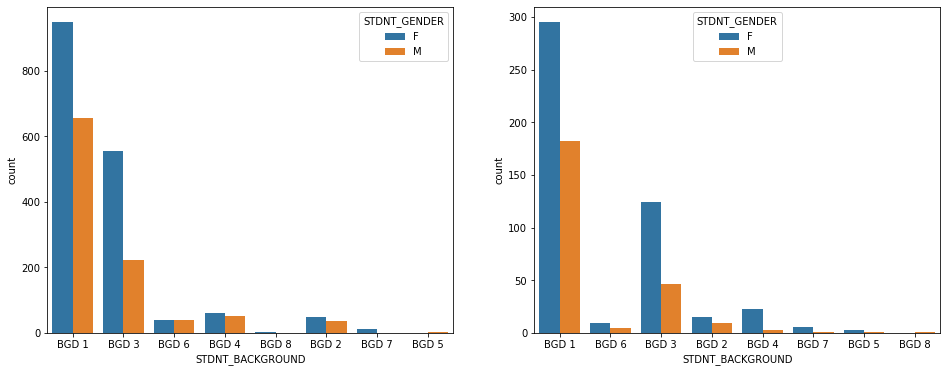

In [26]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(pr_no['STDNT_BACKGROUND'], hue=pr_no['STDNT_GENDER'])

plt.subplot(1,2,2)
sns.countplot(pr_yes['STDNT_BACKGROUND'], hue=pr_yes['STDNT_GENDER'])
plt.show()

#Gender vs Bckground vs target

# IN_STATE_FLAG

In [27]:
pr['IN_STATE_FLAG'].value_counts()

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64

In [28]:
pr['IN_STATE_FLAG'].value_counts(normalize=True)*100

Y    90.088235
N     9.911765
Name: IN_STATE_FLAG, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


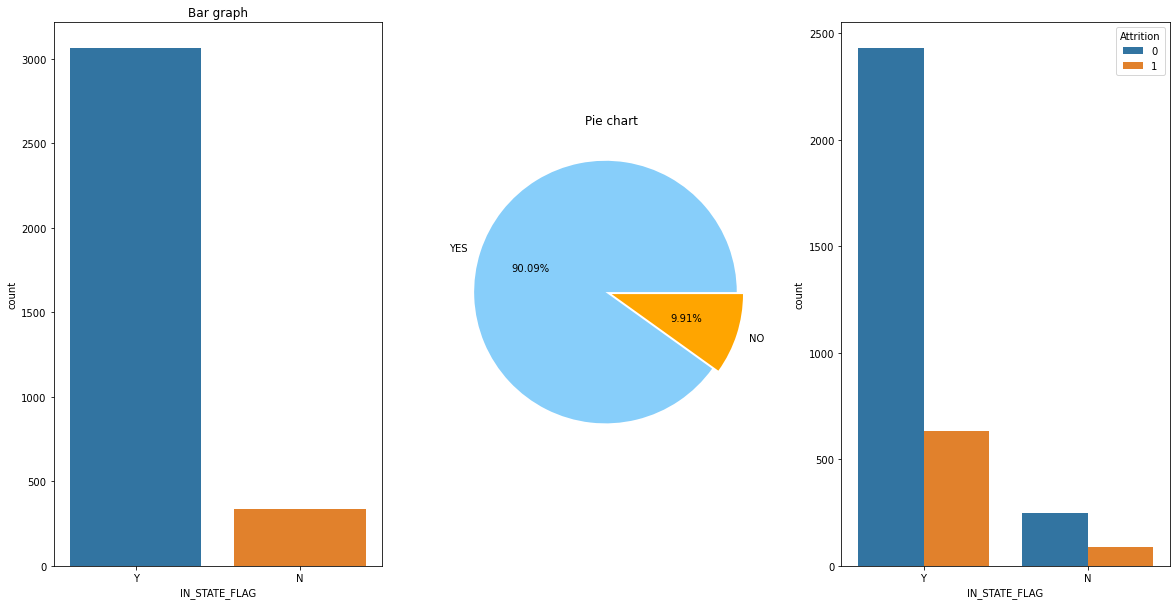

In [29]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(pr['IN_STATE_FLAG'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(pr['IN_STATE_FLAG'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(pr['IN_STATE_FLAG'], hue=pr['Attrition'])

plt.show()

#many are from same state and many student have left the course

In [30]:
pd.crosstab(pr['IN_STATE_FLAG'], pr['Attrition'], normalize='index')

Attrition,0,1
IN_STATE_FLAG,,
N,0.735905,0.264095
Y,0.793013,0.206987


# INTERNATIONAL_STS

In [31]:
pr['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [32]:
pr['IN_STATE_FLAG'].value_counts(normalize=True) * 100

Y    90.088235
N     9.911765
Name: IN_STATE_FLAG, dtype: float64

In [33]:
pd.crosstab(pr['IN_STATE_FLAG'], pr['Attrition'], normalize='index')

Attrition,0,1
IN_STATE_FLAG,,
N,0.735905,0.264095
Y,0.793013,0.206987


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


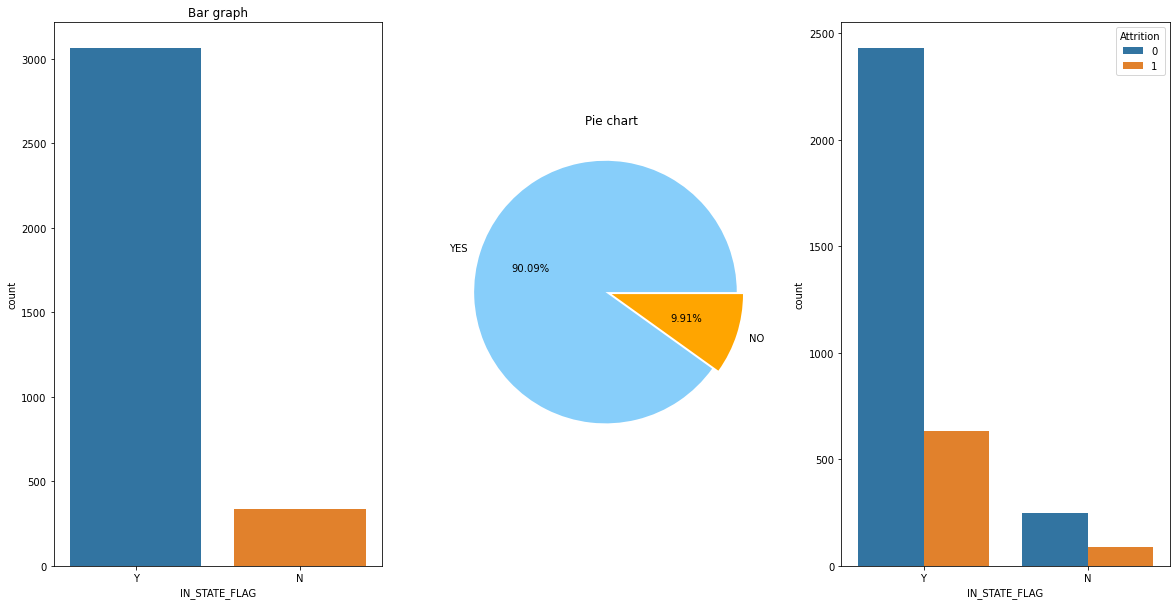

In [34]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(pr['IN_STATE_FLAG'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(pr['IN_STATE_FLAG'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(pr['IN_STATE_FLAG'], hue=pr['Attrition'])

plt.show()

#many are from same state and many student have left the course

# INTERNATIONAL_STS

In [35]:
pr['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [36]:
pr['INTERNATIONAL_STS'].value_counts(normalize=True) * 100

#we can ignore this feature, but we can analyse with target once

N    99.205882
Y     0.794118
Name: INTERNATIONAL_STS, dtype: float64

In [37]:
pd.crosstab(pr['INTERNATIONAL_STS'], pr['Attrition'])

Attrition,0,1
INTERNATIONAL_STS,,
N,2662,711
Y,15,12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


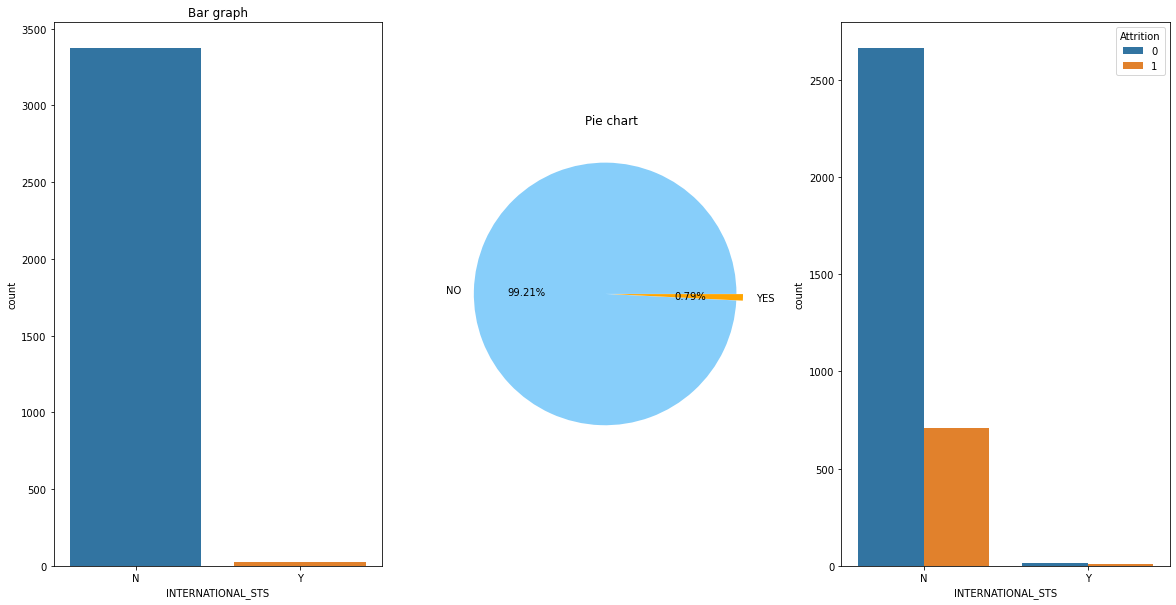

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(pr['INTERNATIONAL_STS'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(pr['INTERNATIONAL_STS'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['NO', 'YES'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(pr['INTERNATIONAL_STS'], hue=pr['Attrition'])

plt.show()

#many are from same state and many student have left the course


# STDNT_MAJOR

In [39]:
pr['STDNT_MAJOR'].isnull().sum()

0

In [40]:
pr['STDNT_MAJOR'].value_counts()

#Many of the students have not declared there majir subject, 

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [41]:
pd.crosstab(pr['STDNT_MAJOR'], pr['Attrition'])

Attrition,0,1
STDNT_MAJOR,,
Accounting,42,12
Applied Computer Science,27,5
Art,57,18
Art Education,7,2
Biology,280,82
Biology and Secondary Ed,2,3
Chemistry,54,10
Chemistry and Secondary Ed,2,0
Communication,56,14


# STDNT_MINOR

In [42]:
pr['STDNT_MINOR'].value_counts(normalize=True) * 100

#93% students have no minor subject

N                                92.941176
Spanish                           0.764706
Psychology                        0.558824
Music                             0.558824
Foundations of Business           0.441176
Communication                     0.411765
History                           0.382353
Theatre Arts                      0.352941
Criminal Justice                  0.352941
Computer Science - Systems        0.294118
Early Childhood Education         0.264706
Mathematics                       0.205882
Professional Writing              0.176471
Marketing                         0.176471
Art History                       0.176471
Art                               0.147059
Sociology                         0.147059
English Language/Literature       0.147059
Political Science                 0.117647
Chemistry                         0.117647
Accounting                        0.117647
Biology                           0.117647
French                            0.117647
Computer In

In [43]:
pd.crosstab(pr['STDNT_MINOR'], pr['Attrition'])

#we can remove this feature

Attrition,0,1
STDNT_MINOR,,
Accounting,3,1
African Studies,2,0
Anthropology,2,0
Art,3,2
Art History,4,2
Asian Studies,2,0
Biology,3,1
Chemistry,4,0
Communication,13,1


# ENtrance test

In [44]:
pr[['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()

#we can consider combined entrance marks

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB', ylabel='Density'>

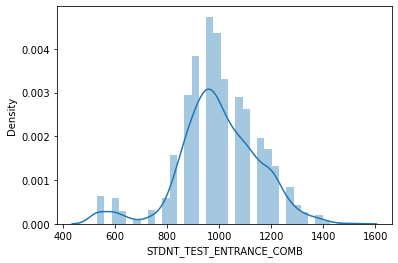

In [45]:
sns.distplot(pr['STDNT_TEST_ENTRANCE_COMB'])

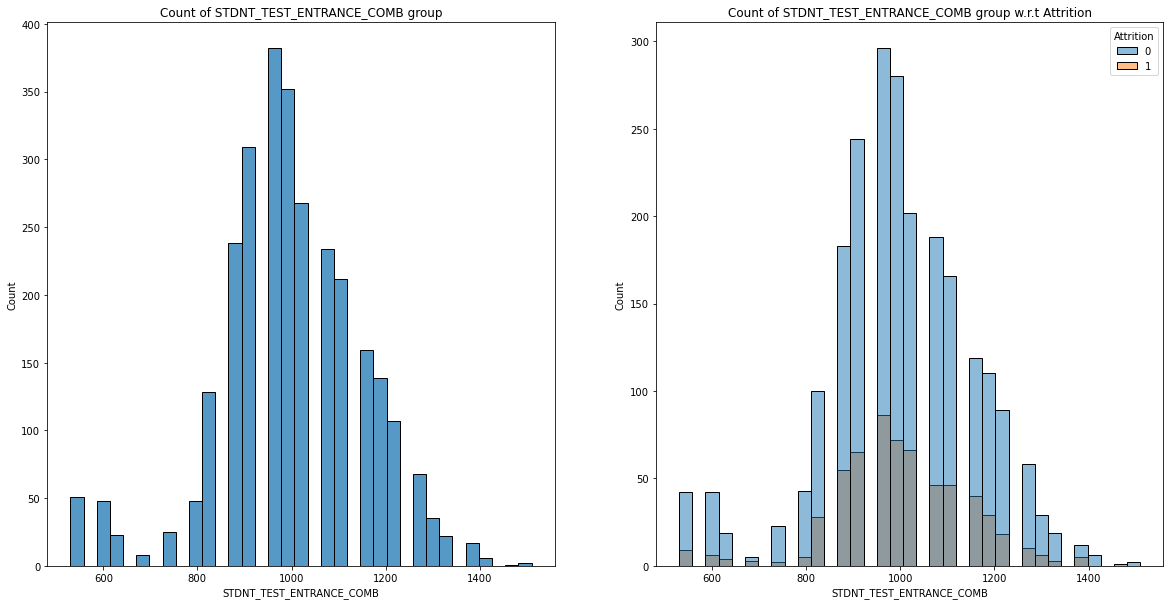

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(pr['STDNT_TEST_ENTRANCE_COMB'])
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group')

plt.subplot(1,2,2)
sns.histplot(data=pr, x='STDNT_TEST_ENTRANCE_COMB', hue='Attrition')
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


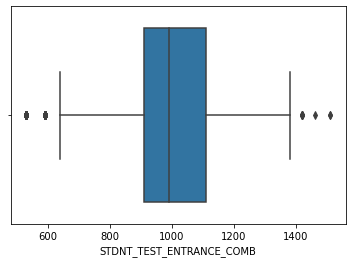

In [47]:
#For null values we can impute mean, data is normal

sns.boxplot(pr['STDNT_TEST_ENTRANCE_COMB'])
plt.show()
#we can use IQR technique to remove outliers

# First term

In [48]:
pr['FIRST_TERM'].min(), pr['FIRST_TERM'].max()

#Data consists of 6years, 2005 to 2010
#we can convert it to year feature and then label encode it

(200508, 201008)

In [49]:
pr[['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']]

,CORE_COURSE_NAME_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_NAME_6_F
0,ANTH 1105,ARTH 1100,ENGL 1102,PSYC 1101,NaN,NaN
1,ANTH 1105,GERM 1002,ITDS 2735,MATH 1125,THEA 1100,POLS 1101
2,ANTH 1105,ENGL 1101,HIST 2111,MATH 1111,SOCI 1101,NaN
3,ANTH 1107,COMM 1110,NaN,NaN,NaN,NaN
4,ANTH 1107,ARTH 1100,CPSC 1105,MATH 1111,NaN,NaN
...,...,...,...,...,...,...
3395,COMM 1110,NaN,NaN,NaN,NaN,NaN
3396,POLS 1101,NaN,NaN,NaN,NaN,NaN
3397,ENGL 1101,NaN,NaN,NaN,NaN,NaN
3398,PSYC 1101,NaN,NaN,NaN,NaN,NaN


In [50]:
pd.concat([pr['CORE_COURSE_NAME_1_F'], pr['CORE_COURSE_NAME_2_F'], pr['CORE_COURSE_NAME_3_F'], pr['CORE_COURSE_NAME_4_F'],
          pr['CORE_COURSE_NAME_5_F'], pr['CORE_COURSE_NAME_6_F']]).value_counts()
#instead of course name, we can consider the grades for each student with number of subjects

ENGL 1101                   2330
HIST 2111                    825
COMM 1110                    780
MATH 1111                    740
POLS 1101                    520
                            ... 
BIOL 1225K                     1
LATN 1002                      1
Life and Career Planning       1
U.S. History to 1865           1
FREN 2002                      1
Length: 83, dtype: int64

In [51]:
pd.concat([pr['CORE_COURSE_GRADE_1_F'], pr['CORE_COURSE_GRADE_2_F'], pr['CORE_COURSE_GRADE_3_F'], pr['CORE_COURSE_GRADE_4_F'],
          pr['CORE_COURSE_GRADE_5_F'], pr['CORE_COURSE_GRADE_6_F']]).value_counts()

B          4100
A          3905
C          2402
D           966
F           595
NOT REP     109
INCOMPL      35
dtype: int64

# Second term

In [52]:
pr['SECOND_TERM'].min(), pr['SECOND_TERM'].max()

#Data consists of 6years, 2005 to 2010
#we can convert it to year feature and then label encode it

(200602, 201102)

In [53]:
pr[['CORE_COURSE_NAME_1_S',  'CORE_COURSE_NAME_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S',
      'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S']]

,CORE_COURSE_NAME_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_NAME_6_S
0,CHEM 1151,CHEM 1151L,COMM 1110,ITDS 2749,NaN,NaN
1,ECON 2105,ENGL 1102,NaN,NaN,NaN,NaN
2,ENGL 1102,ENVS 1105,MUSC 1100,NaN,NaN,NaN
3,ENGL 1102,HIST 2112,LEAD 1705,MUSC 1100,NaN,NaN
4,COMM 1110,ENGL 1101,HIST 2111,PSYC 1101,NaN,NaN
...,...,...,...,...,...,...
3395,NaN,NaN,NaN,NaN,NaN,NaN
3396,POLS 1101,NaN,NaN,NaN,NaN,NaN
3397,NaN,NaN,NaN,NaN,NaN,NaN
3398,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pd.concat([pr['CORE_COURSE_NAME_1_S'], pr['CORE_COURSE_NAME_2_S'], pr['CORE_COURSE_NAME_3_S'], pr['CORE_COURSE_NAME_4_S'],
          pr['CORE_COURSE_NAME_5_S'], pr['CORE_COURSE_NAME_6_S']]).value_counts()
#instead of course name, we can consider the grades for each student with number of subjects

ENGL 1102    1896
POLS 1101     748
COMM 1110     706
MATH 1111     553
HIST 2111     518
             ... 
MATH 2115       3
FREN 2002       2
LATN 1002       2
PHYS 1325       2
GEOL 2225       1
Length: 72, dtype: int64

In [55]:
pd.concat([pr['CORE_COURSE_GRADE_1_S'], pr['CORE_COURSE_GRADE_2_S'], pr['CORE_COURSE_GRADE_3_S'], pr['CORE_COURSE_GRADE_4_S'],
          pr['CORE_COURSE_GRADE_5_S'], pr['CORE_COURSE_GRADE_6_S']]).value_counts()

B          3478
A          3277
C          2097
D           837
F           607
NOT REP      47
INCOMPL      29
Unknown       5
dtype: int64

# HOUSING_STS

In [56]:
pr['HOUSING_STS'].value_counts()

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


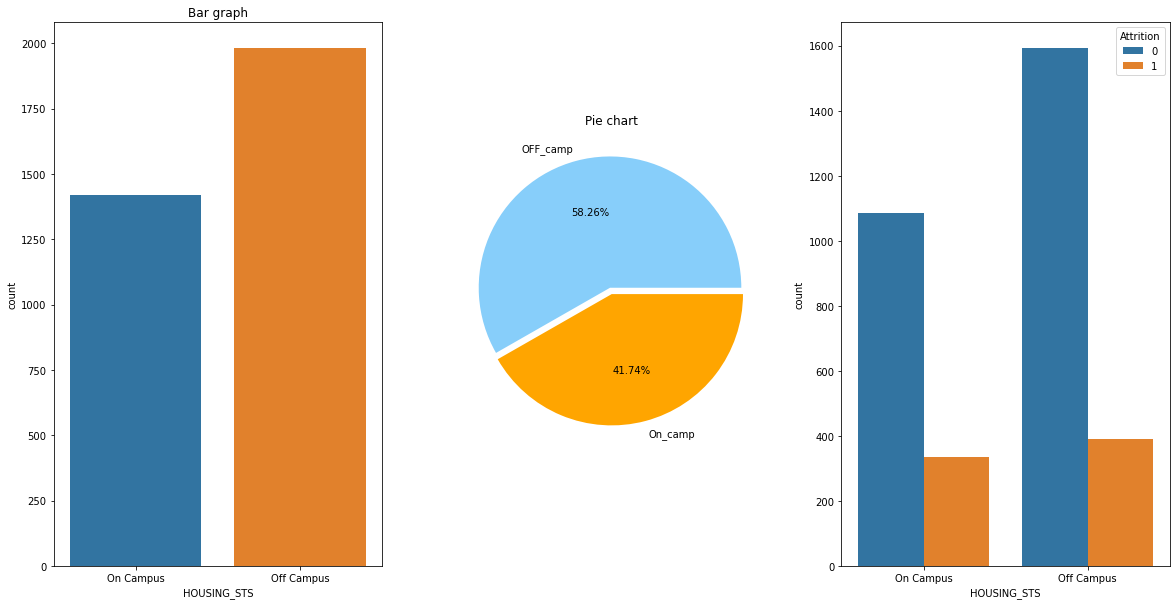

In [57]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(pr['HOUSING_STS'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(pr['HOUSING_STS'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['OFF_camp', 'On_camp'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(pr['HOUSING_STS'], hue=pr['Attrition'])

plt.show()

# DISTANCE_FROM_HOME

In [58]:
pr['DISTANCE_FROM_HOME'].min(), pr['DISTANCE_FROM_HOME'].max()

(0.0, 5932.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Density'>

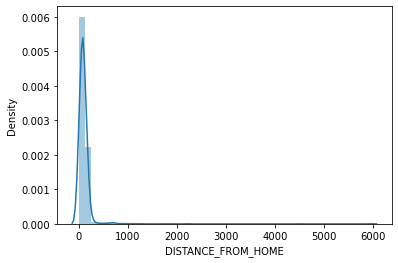

In [59]:
sns.distplot(pr['DISTANCE_FROM_HOME'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DISTANCE_FROM_HOME'>

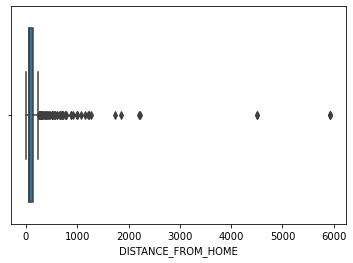

In [60]:
#There are outliers

sns.boxplot(pr['DISTANCE_FROM_HOME'])

# HIGH_SCHL_GPA

In [61]:
pr['HIGH_SCHL_GPA'].isnull().sum()

53

In [62]:
pr['HIGH_SCHL_NAME'].value_counts()

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 398      1
SCHOOL 344      1
SCHOOL 495      1
SCHOOL 493      1
SCHOOL 414      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [63]:
pr['FATHER_HI_EDU_CD'].value_counts()

#we can remove anyone of the columns FATHER_HI_EDU_CD, FATHER_HI_EDU_DESC
#same with mothers education

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64

In [64]:
pr['DEGREE_GROUP_CD'].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [65]:
pr['DEGREE_GROUP_DESC'].value_counts()

#we can remove one columns ==> DEGREE_GROUP_CD or DEGREE_GROUP_DESC and encode the other columns

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

In [66]:
(pr['FIRST_TERM_ATTEMPT_HRS'] - pr['FIRST_TERM_EARNED_HRS']).min()

-3

# Data pre-processing

In [67]:
#remove 'STUDENT IDENTIFIER' column, it is redundant
pr.drop('STUDENT IDENTIFIER', axis=1, inplace=True)

In [68]:
pr.isnull().sum()

STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURSE_GRADE_3_S       1038
CORE_COURS

In [69]:
pr['STDNT_MAJOR'].unique(), pr['STDNT_MAJOR'].nunique()

#There are no null values but there are undeclared category, we can perform a statistical test & decide whether to remove 
#or not

(array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
        'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
        'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
        'Early Childhood Education', 'Music Performance',
        'English Language/Literature', 'Joint Enrollment - Accel',
        'History and Secondary Ed', 'History', 'Engineering Studies',
        'Computer Science - Systems', 'Pre-Business', 'Management',
        'Theatre Education', 'Marketing', 'Communication',
        'Music Education', 'French with Teacher Cert',
        'English and Secondary Ed', 'Exercise Science', 'General Business',
        'Mathematics and Secondary Ed', 'Finance', 'French',
        'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
        'Middle Grades Education', 'Geology',
        'Management Information Systems', 'Art Education',
        'Applied Computer Science', 'Information Technology', 'Sociology',
        'Computer S

In [70]:
from scipy import stats

In [71]:
#if we encode it 54 cat will be formed.
#we can perform a statiscal test to find out whether there is a relationship b/w target and major subject
#Chi2 contingency
# Ho : There is no relation
# Ha : There is a relation
obs = pd.crosstab(pr['Attrition'], pr['STDNT_MAJOR'])
tstat, pvalue, x, exp = stats.chi2_contingency(obs)
print(pvalue)
# pval = 0.0022
# pval < sig lvl
# Ho is rejected
# There is a relation
#we dont remove that feature, instead we can label encode it

0.002281570927520071


In [72]:
#we can perform a statiscal test to find out whether there is a relationship b/w target and minor subject
#Chi2 contingency
# Ho : There is no relation
# Ha : There is a relation
obs = pd.crosstab(pr['Attrition'], pr['STDNT_MINOR'])
tstat, pvalue, x, exp = stats.chi2_contingency(obs)
print(pvalue)
#there is no relationship, we drop that column
pr.drop('STDNT_MINOR', axis=1, inplace=True)

0.5562124183770998


In [73]:
#Entrance exam, we can consider only STDNT_TEST_ENTRANCE_COMB, we can drop other 2 columns

pr.drop(['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2'], axis=1, inplace=True)

In [74]:
print('no of null values', pr['STDNT_TEST_ENTRANCE_COMB'].isnull().sum())
pr['STDNT_TEST_ENTRANCE_COMB'].skew()
#its lightly left skewed, we can impute null with mean value/

no of null values 518


-0.36469197420163796

In [75]:
a = pr['STDNT_TEST_ENTRANCE_COMB'].mean()

pr['STDNT_TEST_ENTRANCE_COMB'] = pr['STDNT_TEST_ENTRANCE_COMB'].fillna(a)

In [76]:
(pr['SECOND_TERM'] - pr['FIRST_TERM']).unique()

array([94], dtype=int64)

In [77]:
#we can remove Second term feature
pr.drop('SECOND_TERM', axis=1, inplace=True)

In [78]:
#we can keep only year as first term and then later we can label encode it
pr['FIRST_TERM'] = pr['FIRST_TERM'].apply(lambda x: str(x)[:4])
#table has 5years of data

In [79]:
#We can remove all the subject names and keep number of subjects each student attended
#we can change the feature as 1 if there is a subject else 0
#list of course feature name taken by each student in first term
course_1 = ['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']
for feat in course_1:
    pr[feat] = pr[feat].fillna(0).apply(lambda x: 0 if x==0 else 1)

In [80]:
pr['No_sub_first_term'] = pr[['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']].sum(axis=1)

In [81]:
#remove those course columns

pr.drop(course_1, axis=1, inplace=True)

In [82]:
#Calculate the grades obtained by each student in overall subjects
#Almost every students have cleared the course, we can delete these grades
pr.drop(['CORE_COURSE_GRADE_1_F',  'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_GRADE_4_F',
      'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_GRADE_6_F'], axis=1, inplace=True)

In [83]:
#WE can calculate no of sunjects taken in 2nd term and delete those columns
#list of course feature name taken by each student in first term
course_2 = ['CORE_COURSE_NAME_1_S',  'CORE_COURSE_NAME_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S',
      'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S']
for feat in course_2:
    pr[feat] = pr[feat].fillna(0).apply(lambda x: 0 if x==0 else 1)

In [84]:
pr['No_sub_second_term'] = pr[['CORE_COURSE_NAME_1_S',  'CORE_COURSE_NAME_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S',
      'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S']].sum(axis=1)

In [85]:
#remove those course columns

pr.drop(course_2, axis=1, inplace=True)

In [86]:
#remove grade columns

pr.drop(['CORE_COURSE_GRADE_1_S',  'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_GRADE_4_S',
      'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_GRADE_6_S'], axis=1, inplace=True)

In [87]:
pr['HOUSING_STS'].value_counts()

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [88]:
pr['DISTANCE_FROM_HOME'].isnull().sum()
#there are 25null values, we can impute the null values
#we can fill mean for null values

25

In [89]:
pr['DISTANCE_FROM_HOME'].fillna(pr['DISTANCE_FROM_HOME'].mean(), inplace=True)

In [90]:
#we can impute null with mean
pr['HIGH_SCHL_GPA'].fillna(pr['HIGH_SCHL_GPA'].mean(), inplace=True)

In [91]:
#1 null value in HIGH_school_name
#we can back fill this record
pr['HIGH_SCHL_NAME'].fillna(method='bfill', inplace=True)

In [92]:
#we could drop FATHER_HI_EDU_CD & MOTHER_HI_EDU_CD, becuase it duplicated with FATHER_HI_EDU_DESC & moTHER_HI_EDU_DESC
pr.drop(['FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD'], axis=1, inplace=True)

In [93]:
# DEGREE_GROUP_CD  and  DEGREE_GROUP_DESC are same, we can drop anyone
pr.drop('DEGREE_GROUP_CD', axis=1, inplace=True)

In [94]:
pr['First_term_backlog_hrs']=(pr['FIRST_TERM_ATTEMPT_HRS']-pr['FIRST_TERM_EARNED_HRS'])

In [95]:
pr.drop('FIRST_TERM_EARNED_HRS', axis=1, inplace=True)

In [96]:
pr['First_term_backlog_hrs'] = pr['First_term_backlog_hrs'].apply(lambda x : 0 if x<0 else x)

In [97]:
# SECOND_TERM_ATTEMPT_HRS & SECOND_TERM_EARNED_HRS have null, might be they left the course after first term,
#we impute with 0
pr['SECOND_TERM_ATTEMPT_HRS'].fillna(0, inplace=True)
pr['SECOND_TERM_EARNED_HRS'].fillna(0, inplace=True)

In [98]:
pr['Second_term_backlog_hrs']  = (pr['SECOND_TERM_ATTEMPT_HRS'] - pr['SECOND_TERM_EARNED_HRS'])
pr['Second_term_backlog_hrs'] = pr['Second_term_backlog_hrs'].apply(lambda x : 0 if x<0 else x)

In [99]:
pr.drop('SECOND_TERM_EARNED_HRS', axis=1, inplace=True)

In [100]:
#we can drop GROSS_FIN_NEED, becuase we have one more column called unmet need
pr.drop('GROSS_FIN_NEED',axis=1, inplace=True)

In [101]:
pr['UNMET_NEED'] = pr['UNMET_NEED'].apply(lambda x: 0 if x<0 else x)

In [102]:
pr.isna().sum().sum()

0

In [103]:
pr.shape

(3400, 25)

In [104]:
pr.duplicated().value_counts()

False    3400
dtype: int64

# Outlier treatment

In [105]:
pr.select_dtypes(include='number').columns

Index(['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'FIRST_TERM_ATTEMPT_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'Attrition',
       'No_sub_first_term', 'No_sub_second_term', 'First_term_backlog_hrs',
       'Second_term_backlog_hrs'],
      dtype='object')

In [106]:
pr = pr[pr['HIGH_SCHL_GPA'] != 0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


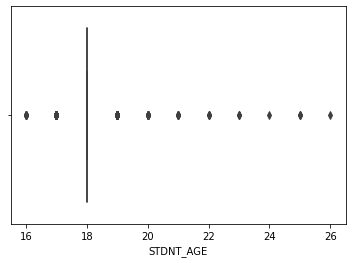

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


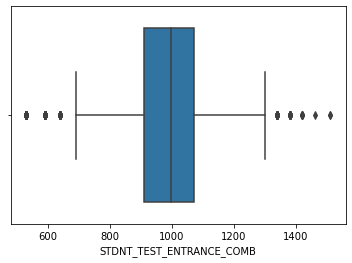

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


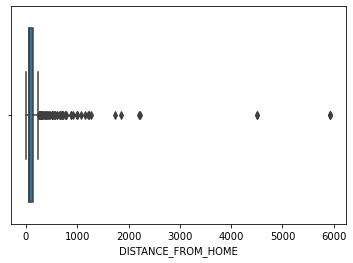

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


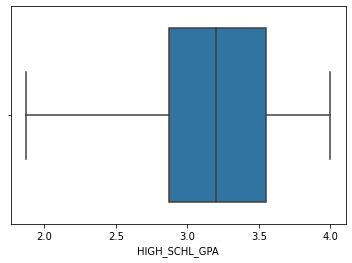

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


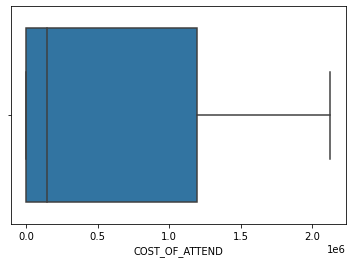

In [107]:
num_list = ['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'COST_OF_ATTEND']

for feat in num_list:
    sns.boxplot(pr[feat])
    plt.show()

In [108]:
#Power transformation to reduce outliers
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [109]:
pr[num_list] =pt.fit_transform(pr[num_list])

# Label encoding

In [110]:
pr.drop('HIGH_SCHL_NAME', axis=1, inplace=True)

In [111]:
cat_list = list(pr.select_dtypes(exclude='number').columns)

In [112]:
cat_list

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'FIRST_TERM',
 'HOUSING_STS',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_DESC']

In [113]:
pr_final = pd.get_dummies(pr, columns=cat_list, drop_first=True)

In [114]:
pr_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3399
Data columns (total 93 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   STDNT_AGE                                     3399 non-null   float64
 1   STDNT_TEST_ENTRANCE_COMB                      3399 non-null   float64
 2   DISTANCE_FROM_HOME                            3399 non-null   float64
 3   HIGH_SCHL_GPA                                 3399 non-null   float64
 4   FIRST_TERM_ATTEMPT_HRS                        3399 non-null   int64  
 5   SECOND_TERM_ATTEMPT_HRS                       3399 non-null   float64
 6   COST_OF_ATTEND                                3399 non-null   float64
 7   EST_FAM_CONTRIBUTION                          3399 non-null   int64  
 8   UNMET_NEED                                    3399 non-null   float64
 9   Attrition                                     3399 non-null   i

In [115]:
# split the data.
X=pr_final.drop('Attrition', axis=1)
y=pr_final['Attrition']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [117]:
#Data transform for Unmet need, EST_FAM_CONTRIBUTION
X_train['EST_FAM_CONTRIBUTION'] = pt.fit_transform(X_train[['EST_FAM_CONTRIBUTION']])
X_test['EST_FAM_CONTRIBUTION'] = pt.transform(X_test[['EST_FAM_CONTRIBUTION']])

In [118]:
X_train['UNMET_NEED'] = pt.fit_transform(X_train[['UNMET_NEED']])
X_test['UNMET_NEED'] = pt.transform(X_test[['UNMET_NEED']])

# Model building

In [119]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

In [120]:
def model_eval(algo, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    y_train_pred = algo.predict(X_train)
    y_train_pred_proba = algo.predict_proba(X_train)[:, 1]

    cm = confusion_matrix(y_train, y_train_pred)
    print('Train dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_train, y_train_pred))
    print('Precision :',precision_score(y_train, y_train_pred))
    print('Recall :', recall_score(y_train, y_train_pred))
    print('AUC score :', roc_auc_score(y_train, y_train_pred_proba))
    print('F1 score :', f1_score(y_train, y_train_pred))
    
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred_proba)

    plt.plot(fpr_train,fpr_train)
    plt.plot(fpr_train,tpr_train)
    plt.show()
    
    
    y_test_pred = algo.predict(X_test)
    y_test_pred_proba = algo.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_test_pred)
    print('\n\nTest dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_test, y_test_pred))
    print('Precision :',precision_score(y_test, y_test_pred))
    print('Recall :', recall_score(y_test, y_test_pred))
    print('AUC score :', roc_auc_score(y_test, y_test_pred_proba))
    print('F1 score :', f1_score(y_test, y_test_pred))
    
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred_proba)

    plt.plot(fpr_test,fpr_test)
    plt.plot(fpr_test,tpr_test)
    plt.show()

# Suggested approaches

## 1.Logistic regression

C:\Users\PRANAY\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train dataset :

Confusion matrix:
 [[1851   30]
 [ 351  147]]
Accuracy : 0.8398486759142497
Precision : 0.8305084745762712
Recall : 0.29518072289156627
AUC score : 0.7563993347125877
F1 score : 0.43555555555555553


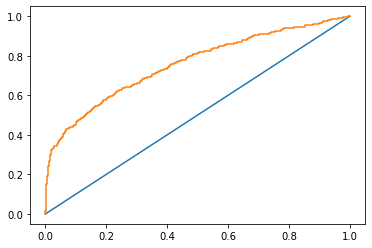



Test dataset :

Confusion matrix:
 [[788   8]
 [155  69]]
Accuracy : 0.8401960784313726
Precision : 0.8961038961038961
Recall : 0.3080357142857143
AUC score : 0.7104103104809764
F1 score : 0.45847176079734214


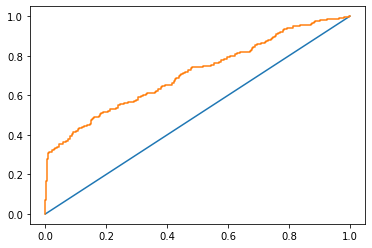

In [121]:
logr = LogisticRegression()
model_eval(logr)

## 1.1 Logistic regression with data imbalance treatment

In [122]:
y.value_counts(normalize=True) * 100

0    78.758458
1    21.241542
Name: Attrition, dtype: float64

In [123]:
from imblearn.over_sampling import SMOTE

In [124]:
from warnings import filterwarnings
filterwarnings('ignore')

In [125]:
sm = SMOTE(random_state=42)

In [126]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [127]:
y_train_sm.value_counts()

1    1881
0    1881
Name: Attrition, dtype: int64

In [128]:
y_train.value_counts()

0    1881
1     498
Name: Attrition, dtype: int64

In [129]:
X_train_sm.duplicated().value_counts()

False    3762
dtype: int64

Train dataset :

Confusion matrix:
 [[1661  220]
 [ 347 1534]]
Accuracy : 0.8492822966507177
Precision : 0.8745724059293044
Recall : 0.8155236576289208
AUC score : 0.9116696498548258
F1 score : 0.8440165061898212


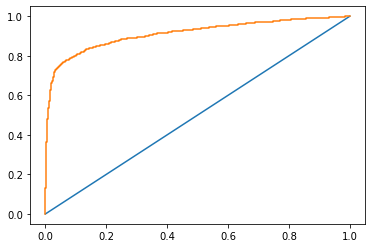



Test dataset :

Confusion matrix:
 [[688 108]
 [134  90]]
Accuracy : 0.7627450980392156
Precision : 0.45454545454545453
Recall : 0.4017857142857143
AUC score : 0.6826543431442929
F1 score : 0.42654028436018965


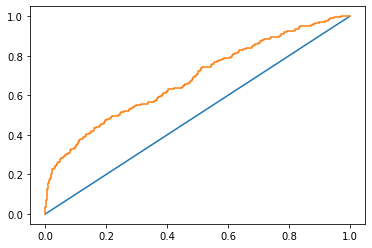

In [130]:
lor = LogisticRegression()
model_eval(lor, X_train_sm, X_test, y_train_sm, y_test)

## 1.3 Feature selection, LOG reg

In [131]:
X['UNMET_NEED'] = pt.fit_transform(X[['UNMET_NEED']])
X['EST_FAM_CONTRIBUTION'] = pt.fit_transform(X[['EST_FAM_CONTRIBUTION']])

In [132]:
from sklearn.feature_selection import RFECV

In [133]:
lor = LogisticRegression()
feat_sel = RFECV(lor, cv=3, scoring='roc_auc', n_jobs=-1)
feat_sel.fit(X,y)

RFECV(cv=3, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

In [134]:
feat_sel.n_features_

76

In [135]:
rfe_df = pd.DataFrame(feat_sel.ranking_, index=X.columns, columns=['rank'])

In [136]:
selected = list(rfe_df[rfe_df['rank'] == 1].index)

In [137]:
X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

Train dataset :

Confusion matrix:
 [[1852   29]
 [ 348  150]]
Accuracy : 0.8415300546448088
Precision : 0.8379888268156425
Recall : 0.30120481927710846
AUC score : 0.7547382512506166
F1 score : 0.4431314623338257


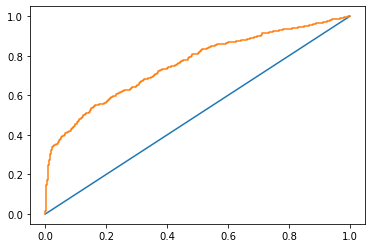



Test dataset :

Confusion matrix:
 [[787   9]
 [156  68]]
Accuracy : 0.8382352941176471
Precision : 0.8831168831168831
Recall : 0.30357142857142855
AUC score : 0.7188285175879396
F1 score : 0.4518272425249169


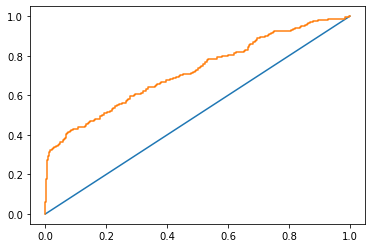

In [138]:
lor = LogisticRegression()
model_eval(lor, X_train_sel, X_test_sel, y_train, y_test)

In [139]:
X_train_sm_sel = X_train_sm[selected]
X_test_sm_sel = X_test[selected]

Train dataset :

Confusion matrix:
 [[1615  266]
 [ 344 1537]]
Accuracy : 0.837852206273259
Precision : 0.8524681087077094
Recall : 0.8171185539606592
AUC score : 0.8988734543170874
F1 score : 0.8344191096634094


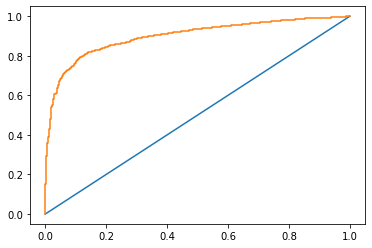



Test dataset :

Confusion matrix:
 [[674 122]
 [132  92]]
Accuracy : 0.7509803921568627
Precision : 0.42990654205607476
Recall : 0.4107142857142857
AUC score : 0.6694970387652549
F1 score : 0.4200913242009132


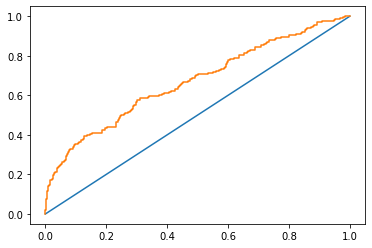

In [140]:
model_eval(lor, X_train_sm_sel, X_test_sm_sel, y_train_sm, y_test)

# 2. Decision Tree Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0  498]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


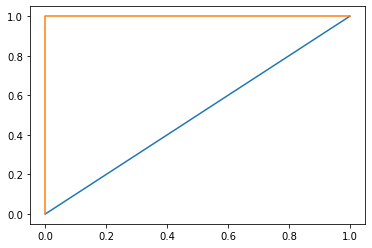



Test dataset :

Confusion matrix:
 [[666 130]
 [139  85]]
Accuracy : 0.7362745098039216
Precision : 0.3953488372093023
Recall : 0.3794642857142857
AUC score : 0.6080738513998564
F1 score : 0.38724373576309795


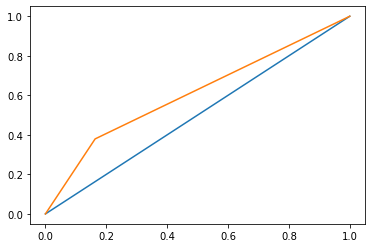

In [142]:
dtc = DecisionTreeClassifier(random_state=42)
model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0 1881]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


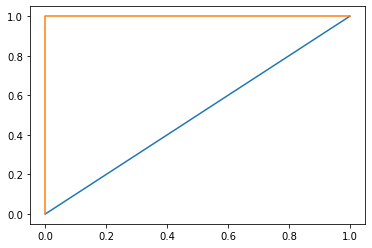



Test dataset :

Confusion matrix:
 [[624 172]
 [124 100]]
Accuracy : 0.7098039215686275
Precision : 0.36764705882352944
Recall : 0.44642857142857145
AUC score : 0.6151740847092606
F1 score : 0.403225806451613


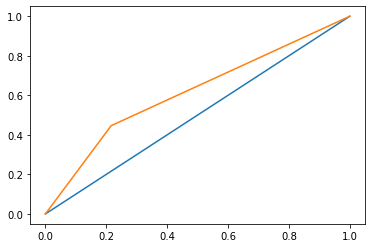

In [143]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [145]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split' : np.arange(2,15)
}

In [146]:
dtc = DecisionTreeClassifier()
g_search = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3)+:
g_search.fit(X,y)

Fitting 3 folds for each of 286 candidates, totalling 858 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [147]:
g_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 14}

In [148]:
pd.DataFrame(g_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059295,0.002622,0.017991,0.000002,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468818,0.440673,0.077806,258
1,0.072287,0.005729,0.021656,0.003855,gini,5,3,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468902,0.440701,0.077816,256
2,0.063293,0.003855,0.019656,0.003090,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469844,0.441015,0.077931,253
3,0.057964,0.003740,0.024652,0.007404,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469872,0.441025,0.077935,251
4,0.068957,0.012669,0.021320,0.003300,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469844,0.441015,0.077931,253


Train dataset :

Confusion matrix:
 [[1847   34]
 [ 278  220]]
Accuracy : 0.8688524590163934
Precision : 0.8661417322834646
Recall : 0.44176706827309237
AUC score : 0.8105665618347927
F1 score : 0.5851063829787234


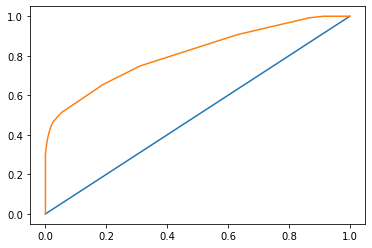



Test dataset :

Confusion matrix:
 [[755  41]
 [160  64]]
Accuracy : 0.8029411764705883
Precision : 0.6095238095238096
Recall : 0.2857142857142857
AUC score : 0.6143692794328786
F1 score : 0.3890577507598784


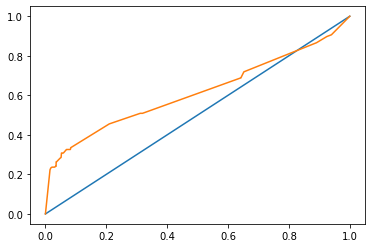

In [149]:
dtc = DecisionTreeClassifier(**g_search.best_params_, random_state=42)
model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1666  215]
 [ 184 1697]]
Accuracy : 0.8939393939393939
Precision : 0.8875523012552301
Recall : 0.9021796916533759
AUC score : 0.9600623035526082
F1 score : 0.8948062219878724


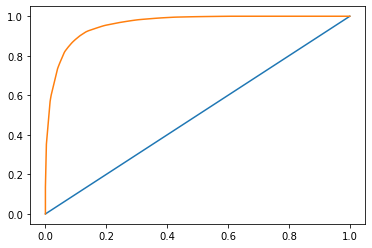



Test dataset :

Confusion matrix:
 [[622 174]
 [128  96]]
Accuracy : 0.703921568627451
Precision : 0.35555555555555557
Recall : 0.42857142857142855
AUC score : 0.6476383031227566
F1 score : 0.388663967611336


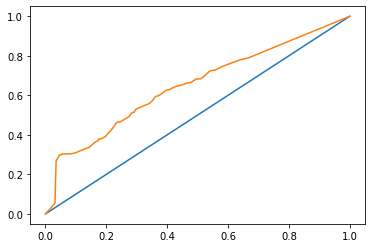

In [150]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

In [151]:
#RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [152]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,12)
}

In [153]:
dtc= DecisionTreeClassifier()
r_search = RandomizedSearchCV(dtc, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3, random_state=42)
r_search.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027616BA4F40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027617C2D9A0>},
                   random_state=42, scoring='roc_auc', verbose=3)

In [154]:
r_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 11}

In [155]:
pd.DataFrame(r_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056631,0.001247,0.016991,0.001414,gini,5,9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468846,0.440682,0.077809,57
1,0.067625,0.002863,0.016991,0.000816,gini,6,8,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.490073,0.357312,0.499776,0.449054,0.064992,47
2,0.059295,0.006846,0.018323,0.001246,entropy,4,8,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.490178,0.336488,0.351264,0.392643,0.069231,97
3,0.054633,0.003856,0.024318,0.009667,gini,4,9,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.519009,0.335769,0.429027,0.427935,0.074811,64
4,0.076953,0.015567,0.017324,0.000943,gini,5,9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469844,0.441015,0.077931,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.061628,0.013687,0.018324,0.001699,gini,4,5,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.519009,0.335769,0.429027,0.427935,0.074811,64
96,0.095939,0.004896,0.018323,0.001247,entropy,8,5,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.553284,0.421580,0.556430,0.510431,0.062840,27
97,0.036975,0.001632,0.017324,0.002054,gini,2,9,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.503275,0.501770,0.426584,0.477210,0.035803,36
98,0.085615,0.003858,0.015658,0.002622,entropy,8,3,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.554782,0.419734,0.563963,0.512826,0.065933,26


Train dataset :

Confusion matrix:
 [[1863   18]
 [ 320  178]]
Accuracy : 0.8579234972677595
Precision : 0.9081632653061225
Recall : 0.357429718875502
AUC score : 0.7630906400722508
F1 score : 0.5129682997118156


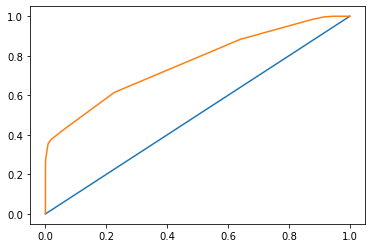



Test dataset :

Confusion matrix:
 [[778  18]
 [163  61]]
Accuracy : 0.8225490196078431
Precision : 0.7721518987341772
Recall : 0.27232142857142855
AUC score : 0.6270919328786793
F1 score : 0.40264026402640263


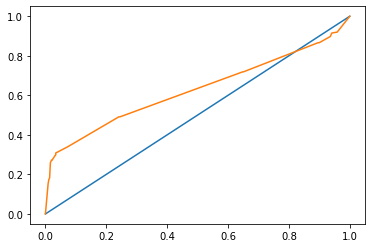

In [156]:
dtc = DecisionTreeClassifier(**r_search.best_params_, random_state=42)
model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1482  399]
 [ 371 1510]]
Accuracy : 0.7953216374269005
Precision : 0.7909900471451021
Recall : 0.8027644869750132
AUC score : 0.8950073216001194
F1 score : 0.7968337730870713


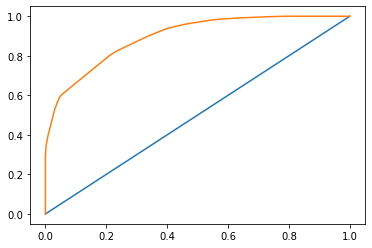



Test dataset :

Confusion matrix:
 [[608 188]
 [119 105]]
Accuracy : 0.6990196078431372
Precision : 0.3583617747440273
Recall : 0.46875
AUC score : 0.6594355707106963
F1 score : 0.4061895551257253


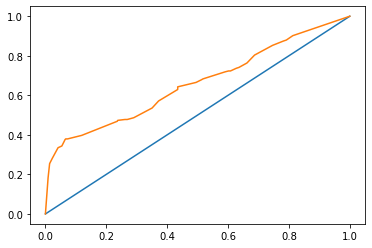

In [157]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

# 3. Random forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0  498]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


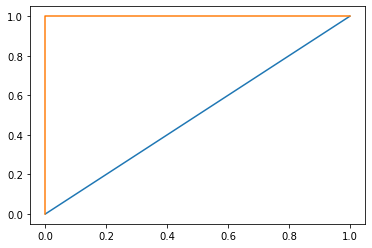



Test dataset :

Confusion matrix:
 [[789   7]
 [161  63]]
Accuracy : 0.8352941176470589
Precision : 0.9
Recall : 0.28125
AUC score : 0.6967426417803303
F1 score : 0.4285714285714286


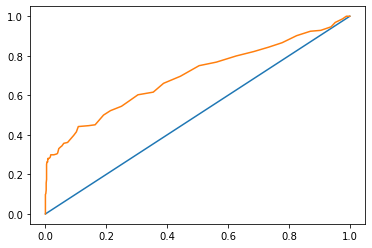

In [159]:
rfc = RandomForestClassifier(random_state=42)
model_eval(rfc)

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0 1881]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


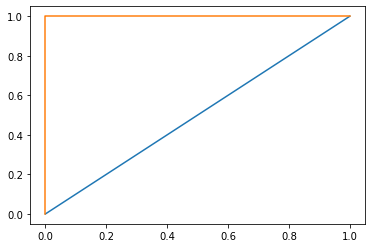



Test dataset :

Confusion matrix:
 [[757  39]
 [155  69]]
Accuracy : 0.8098039215686275
Precision : 0.6388888888888888
Recall : 0.3080357142857143
AUC score : 0.6998356739052405
F1 score : 0.41566265060240964


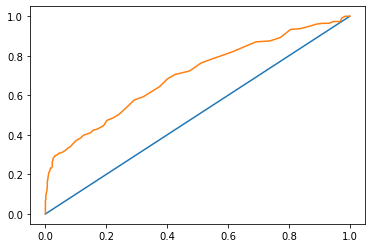

In [160]:
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

In [161]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,20),
    'min_samples_split' : sp_randint(2,25),
    'n_estimators' : sp_randint(100,200)
}
rfc = RandomForestClassifier()

In [162]:
r_search = RandomizedSearchCV(rfc, param_distributions=params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)
r_search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276184F6A30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276185012B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276181BCB20>},
                   random_state=42, scoring='roc_auc')

In [163]:
r_search.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 15,
 'n_estimators': 102}

Train dataset :

Confusion matrix:
 [[1864   17]
 [ 353  145]]
Accuracy : 0.8444724674232871
Precision : 0.8950617283950617
Recall : 0.29116465863453816
AUC score : 0.9669523388610263
F1 score : 0.43939393939393934


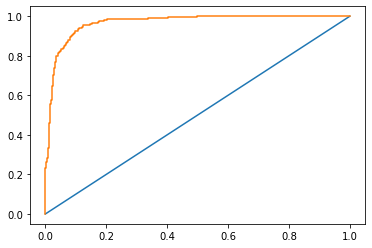



Test dataset :

Confusion matrix:
 [[790   6]
 [162  62]]
Accuracy : 0.8352941176470589
Precision : 0.9117647058823529
Recall : 0.2767857142857143
AUC score : 0.7077687544867194
F1 score : 0.4246575342465753


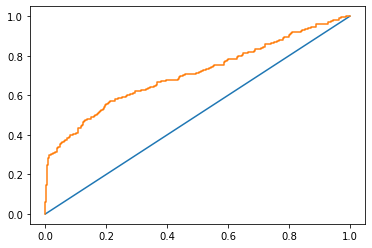

In [164]:
rfc = RandomForestClassifier(**r_search.best_params_, random_state=42)
model_eval(rfc)

Train dataset :

Confusion matrix:
 [[1830   51]
 [ 180 1701]]
Accuracy : 0.9385964912280702
Precision : 0.9708904109589042
Recall : 0.9043062200956937
AUC score : 0.9919017252182702
F1 score : 0.9364161849710982


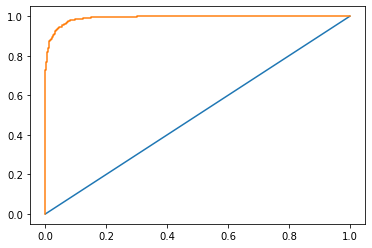



Test dataset :

Confusion matrix:
 [[749  47]
 [151  73]]
Accuracy : 0.8058823529411765
Precision : 0.6083333333333333
Recall : 0.32589285714285715
AUC score : 0.6871186288585787
F1 score : 0.42441860465116277


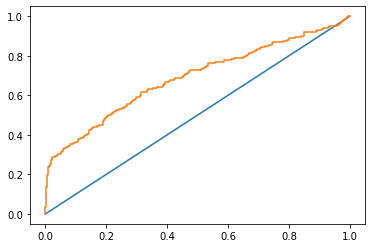

In [165]:
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

## 4.KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

Train dataset :

Confusion matrix:
 [[1827   54]
 [ 306  192]]
Accuracy : 0.8486759142496847
Precision : 0.7804878048780488
Recall : 0.3855421686746988
AUC score : 0.8696038807009003
F1 score : 0.5161290322580645


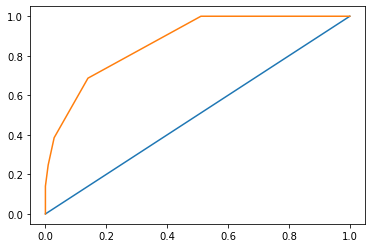



Test dataset :

Confusion matrix:
 [[763  33]
 [156  68]]
Accuracy : 0.8147058823529412
Precision : 0.6732673267326733
Recall : 0.30357142857142855
AUC score : 0.6667937903804738
F1 score : 0.4184615384615385


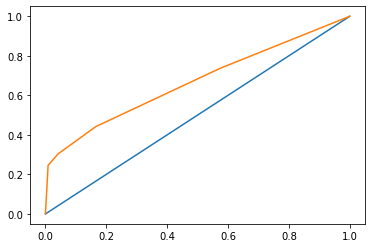

In [167]:
knn = KNeighborsClassifier()
model_eval(knn)

Train dataset :

Confusion matrix:
 [[1174  707]
 [  16 1865]]
Accuracy : 0.8078149920255183
Precision : 0.7251166407465007
Recall : 0.9914938862307283
AUC score : 0.9816367881506806
F1 score : 0.8376375477206377


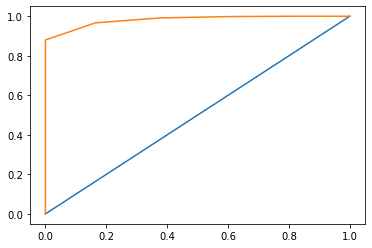



Test dataset :

Confusion matrix:
 [[407 389]
 [ 77 147]]
Accuracy : 0.5431372549019607
Precision : 0.27425373134328357
Recall : 0.65625
AUC score : 0.6356503499641063
F1 score : 0.3868421052631579


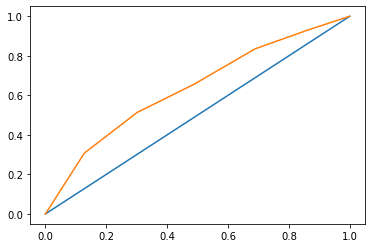

In [168]:
model_eval(knn, X_train_sm, X_test, y_train_sm, y_test)

## 5. Lightgbm

In [169]:
import lightgbm as lgb 

In [170]:
lgbc = lgb.LGBMClassifier()

In [171]:
lgbc.fit(np.array(X_train), y_train)

LGBMClassifier()

Train dataset :

Confusion matrix:
 [[1877    4]
 [  92  406]]
Accuracy : 0.9596469104665826
Precision : 0.9902439024390244
Recall : 0.8152610441767069
AUC score : 0.9973578524624815
F1 score : 0.894273127753304


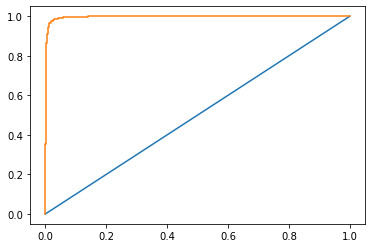



Test dataset :

Confusion matrix:
 [[774  22]
 [152  72]]
Accuracy : 0.8294117647058824
Precision : 0.7659574468085106
Recall : 0.32142857142857145
AUC score : 0.7160411432160804
F1 score : 0.4528301886792453


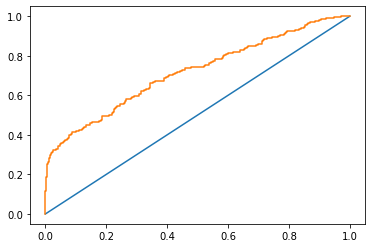

In [172]:
model_eval(lgbc, np.array(X_train), np.array(X_test), y_train, y_test)

Train dataset :

Confusion matrix:
 [[1863   18]
 [ 111 1770]]
Accuracy : 0.9657097288676236
Precision : 0.9899328859060402
Recall : 0.9409888357256778
AUC score : 0.9973296862409596
F1 score : 0.9648405560098119


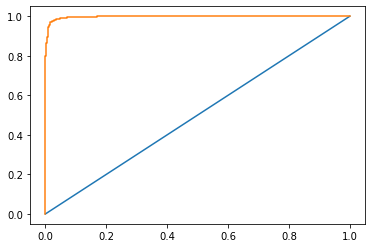



Test dataset :

Confusion matrix:
 [[754  42]
 [143  81]]
Accuracy : 0.8186274509803921
Precision : 0.6585365853658537
Recall : 0.36160714285714285
AUC score : 0.7193557071069634
F1 score : 0.4668587896253602


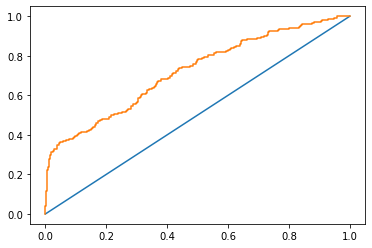

In [173]:
model_eval(lgbc, np.array(X_train_sm), np.array(X_test), y_train_sm, y_test)

## 6. GradientBoostingClassifier

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

Train dataset :

Confusion matrix:
 [[1868   13]
 [ 335  163]]
Accuracy : 0.8537200504413619
Precision : 0.9261363636363636
Recall : 0.3273092369477912
AUC score : 0.8727488369213163
F1 score : 0.4836795252225519


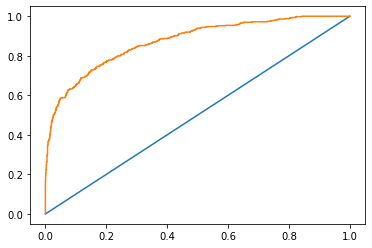



Test dataset :

Confusion matrix:
 [[780  16]
 [164  60]]
Accuracy : 0.8235294117647058
Precision : 0.7894736842105263
Recall : 0.26785714285714285
AUC score : 0.7263942480258434
F1 score : 0.4


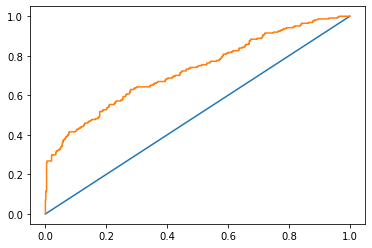

In [175]:
model_eval(gbc)

Train dataset :

Confusion matrix:
 [[1751  130]
 [ 284 1597]]
Accuracy : 0.8899521531100478
Precision : 0.9247249565720903
Recall : 0.849016480595428
AUC score : 0.9493789287711893
F1 score : 0.8852549889135254


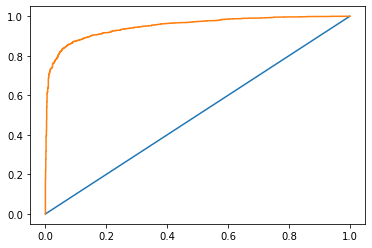



Test dataset :

Confusion matrix:
 [[717  79]
 [144  80]]
Accuracy : 0.7813725490196078
Precision : 0.5031446540880503
Recall : 0.35714285714285715
AUC score : 0.7082342516152189
F1 score : 0.41775456919060056


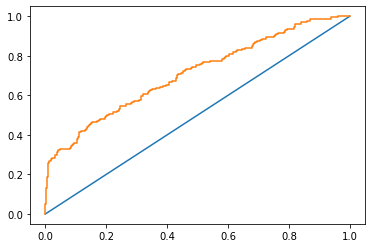

In [176]:
model_eval(gbc, X_train_sm, X_test, y_train_sm, y_test)

## 7. XGBoost

In [177]:
from xgboost import XGBClassifier

Train dataset :

Confusion matrix:
 [[1881    0]
 [  44  454]]
Accuracy : 0.9815048339638504
Precision : 1.0
Recall : 0.9116465863453815
AUC score : 0.9998291945026251
F1 score : 0.9537815126050421


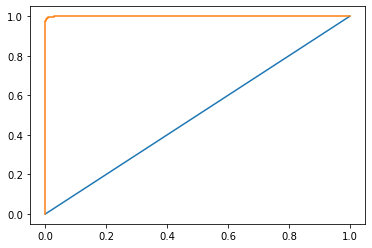



Test dataset :

Confusion matrix:
 [[754  42]
 [153  71]]
Accuracy : 0.8088235294117647
Precision : 0.6283185840707964
Recall : 0.3169642857142857
AUC score : 0.7191145459440057
F1 score : 0.42136498516320475


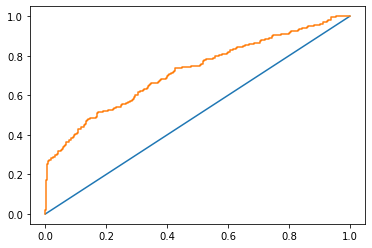

In [178]:
xgb = XGBClassifier()
model_eval(xgb)

Train dataset :

Confusion matrix:
 [[1877    4]
 [  41 1840]]
Accuracy : 0.9880382775119617
Precision : 0.9978308026030369
Recall : 0.9782030834662414
AUC score : 0.9995949873394683
F1 score : 0.9879194630872484


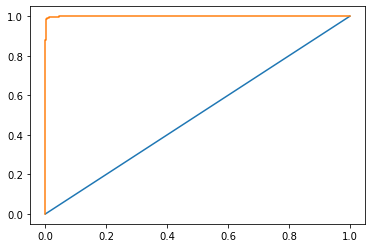



Test dataset :

Confusion matrix:
 [[743  53]
 [145  79]]
Accuracy : 0.8058823529411765
Precision : 0.5984848484848485
Recall : 0.35267857142857145
AUC score : 0.7274318018664752
F1 score : 0.4438202247191011


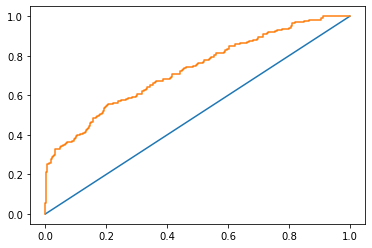

In [179]:
model_eval(xgb, X_train_sm, X_test, y_train_sm, y_test)

In [180]:
xGB_model = XGBClassifier(random_state = 4, max_depth = 8, 
                            n_estimators = 3000, reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

Train dataset :

Confusion matrix:
 [[1879    2]
 [   3 1878]]
Accuracy : 0.9986709197235513
Precision : 0.9989361702127659
Recall : 0.9984051036682615
AUC score : 0.9999918036516711
F1 score : 0.9986705663387396


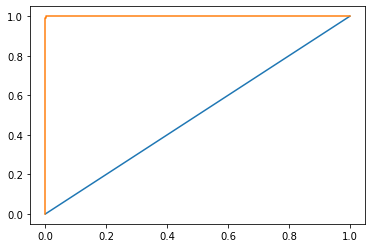



Test dataset :

Confusion matrix:
 [[750  46]
 [150  74]]
Accuracy : 0.807843137254902
Precision : 0.6166666666666667
Recall : 0.33035714285714285
AUC score : 0.7236405240488155
F1 score : 0.43023255813953487


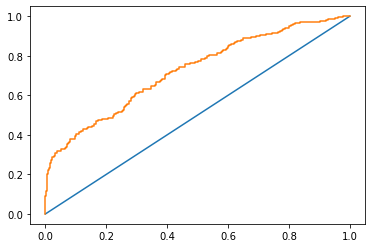

In [181]:
model_eval(xGB_model, X_train_sm, X_test, y_train_sm, y_test)

## 8.ADA boost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

Train dataset :

Confusion matrix:
 [[1857   24]
 [ 352  146]]
Accuracy : 0.8419503993274485
Precision : 0.8588235294117647
Recall : 0.2931726907630522
AUC score : 0.7914059213995803
F1 score : 0.437125748502994


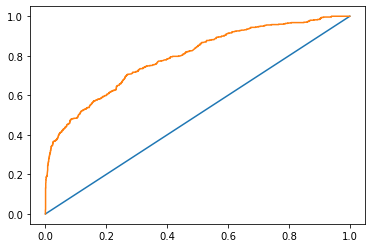



Test dataset :

Confusion matrix:
 [[781  15]
 [163  61]]
Accuracy : 0.8254901960784313
Precision : 0.8026315789473685
Recall : 0.27232142857142855
AUC score : 0.709560638011486
F1 score : 0.4066666666666666


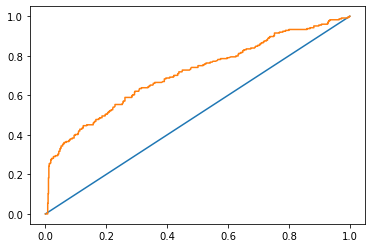

In [183]:
ada = AdaBoostClassifier()
model_eval(ada)

Train dataset :

Confusion matrix:
 [[1637  244]
 [ 305 1576]]
Accuracy : 0.854066985645933
Precision : 0.865934065934066
Recall : 0.837852206273259
AUC score : 0.9132238470776203
F1 score : 0.8516617130505268


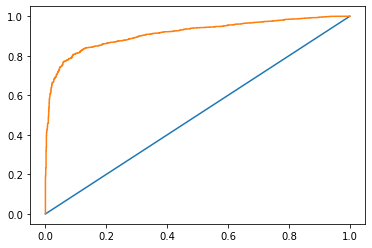



Test dataset :

Confusion matrix:
 [[681 115]
 [133  91]]
Accuracy : 0.7568627450980392
Precision : 0.441747572815534
Recall : 0.40625
AUC score : 0.6948357860732233
F1 score : 0.4232558139534884


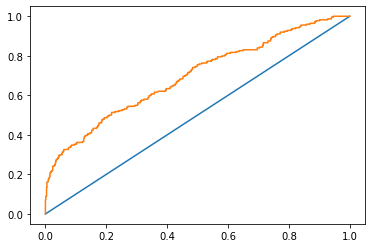

In [184]:
model_eval(ada, X_train_sm, X_test, y_train_sm, y_test)

## 9. Gaussian NB

In [185]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Train dataset :

Confusion matrix:
 [[ 104 1777]
 [   7  491]]
Accuracy : 0.25010508617065996
Precision : 0.21649029982363316
Recall : 0.9859437751004017
AUC score : 0.5727775535955625
F1 score : 0.3550253073029646


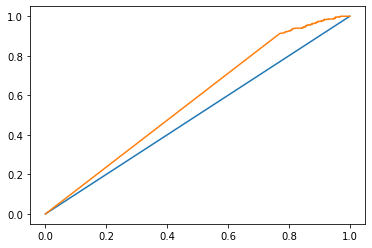



Test dataset :

Confusion matrix:
 [[ 49 747]
 [ 15 209]]
Accuracy : 0.2529411764705882
Precision : 0.2186192468619247
Recall : 0.9330357142857143
AUC score : 0.5396233399138549
F1 score : 0.3542372881355932


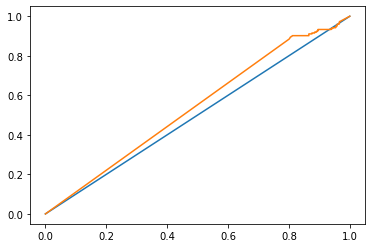

In [186]:
model_eval(nb)

Train dataset :

Confusion matrix:
 [[ 596 1285]
 [ 108 1773]]
Accuracy : 0.6297182349813929
Precision : 0.5797907128842381
Recall : 0.9425837320574163
AUC score : 0.7011306155938071
F1 score : 0.7179591010325979


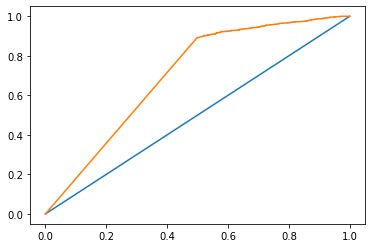



Test dataset :

Confusion matrix:
 [[259 537]
 [ 57 167]]
Accuracy : 0.4176470588235294
Precision : 0.2372159090909091
Recall : 0.7455357142857143
AUC score : 0.5660585292534098
F1 score : 0.3599137931034483


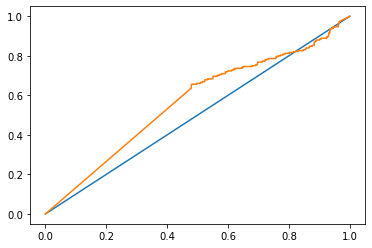

In [187]:
model_eval(nb, X_train_sm, X_test, y_train_sm, y_test)

In [188]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns)

,0
STDNT_AGE,0.016484
STDNT_TEST_ENTRANCE_COMB,0.045897
DISTANCE_FROM_HOME,0.073030
HIGH_SCHL_GPA,0.056751
FIRST_TERM_ATTEMPT_HRS,0.020402
...,...
MOTHER_HI_EDU_DESC_Middle School/Junior High,0.001827
MOTHER_HI_EDU_DESC_No Information,0.006995
MOTHER_HI_EDU_DESC_Other/Unknown,0.004997
DEGREE_GROUP_DESC_Bachelors,0.000251


# Logistic regression gave best results

Train dataset :

Confusion matrix:
 [[1851   30]
 [ 351  147]]
Accuracy : 0.8398486759142497
Precision : 0.8305084745762712
Recall : 0.29518072289156627
AUC score : 0.7563993347125877
F1 score : 0.43555555555555553


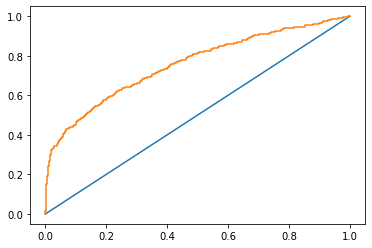



Test dataset :

Confusion matrix:
 [[788   8]
 [155  69]]
Accuracy : 0.8401960784313726
Precision : 0.8961038961038961
Recall : 0.3080357142857143
AUC score : 0.7104103104809764
F1 score : 0.45847176079734214


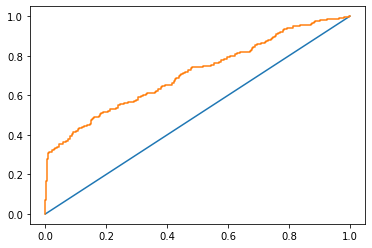

In [189]:
lor = LogisticRegression()
model_eval(lor)